In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report


In [ ]:
data=pd.read_csv('Men Test Player Innings Stats - 21st Century.csv')

In [ ]:
data.columns

Index(['Innings Player', 'Innings Runs Scored', 'Innings Runs Scored Num',
       'Innings Minutes Batted', 'Innings Batted Flag', 'Innings Not Out Flag',
       'Innings Balls Faced', 'Innings Boundary Fours',
       'Innings Boundary Sixes', 'Innings Batting Strike Rate',
       'Innings Number', 'Opposition', 'Ground', 'Innings Date', 'Country',
       '50's', '100's', 'Innings Runs Scored Buckets', 'Innings Overs Bowled',
       'Innings Bowled Flag', 'Innings Maidens Bowled',
       'Innings Runs Conceded', 'Innings Wickets Taken', '4 Wickets',
       '5 Wickets', '10 Wickets', 'Innings Wickets Taken Buckets',
       'Innings Economy Rate'],
      dtype='object')

In [ ]:
data.isnull().any()

Innings Player                   False
Innings Runs Scored               True
Innings Runs Scored Num           True
Innings Minutes Batted            True
Innings Batted Flag               True
Innings Not Out Flag              True
Innings Balls Faced               True
Innings Boundary Fours            True
Innings Boundary Sixes            True
Innings Batting Strike Rate       True
Innings Number                   False
Opposition                       False
Ground                           False
Innings Date                     False
Country                          False
50's                              True
100's                             True
Innings Runs Scored Buckets       True
Innings Overs Bowled              True
Innings Bowled Flag               True
Innings Maidens Bowled            True
Innings Runs Conceded             True
Innings Wickets Taken             True
4 Wickets                         True
5 Wickets                         True
10 Wickets               

In [ ]:
bat=data[data['Innings Overs Bowled'].isnull()]

In [ ]:
bat=bat.drop(['Innings Overs Bowled',
              'Innings Bowled Flag', 'Innings Maidens Bowled',
              'Innings Runs Conceded', 'Innings Wickets Taken', '4 Wickets',
              '5 Wickets', '10 Wickets', 'Innings Wickets Taken Buckets',
              'Innings Economy Rate','Innings Runs Scored Num', 'Innings Minutes Batted',
              'Innings Batted Flag','Innings Not Out Flag'],axis=1)

In [ ]:
bat.head()

,Innings Player,Innings Runs Scored,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets
0,AN Cook,294,545,33,0,53.94,2,v India,Birmingham,2011/08/10,England,0.0,1.0,200+
1,AN Cook,263,528,18,0,49.81,2,v Pakistan,Abu Dhabi,2015/10/13,England,0.0,1.0,200+
2,BA Stokes,258,198,30,11,130.30,1,v South Africa,Cape Town,2016/01/02,England,0.0,1.0,200+
3,JE Root,254,406,27,0,62.56,1,v Pakistan,Manchester,2016/07/22,England,0.0,1.0,200+
4,AN Cook,244*,409,27,0,59.65,2,v Australia,Melbourne,2017/12/26,England,0.0,1.0,200+


In [ ]:
bat['Innings_Runs_Score']=0
bat=bat[(bat['Innings Runs Scored']!='DNB') & (bat['Innings Runs Scored']!='TDNB')]

In [ ]:
runs = r'([0-9]*)'
index_2=bat.columns.get_loc('Innings Runs Scored')
index_runs=bat.columns.get_loc('Innings_Runs_Score')
for row in range(0,len(bat)):
    run=re.search(runs,bat.iat[row,index_2]).group()
    if run!='':
        bat.iat[row,index_runs]=int(run)

In [88]:
bat['Innings Boundary Fours']=dat['Innings Boundary Fours']
bat['Innings Boundary Fours']
bat.isnull().any()

Innings Player                 False
Innings Balls Faced            False
Innings Boundary Fours         False
Innings Boundary Sixes         False
Innings Batting Strike Rate    False
Opposition                     False
Ground                         False
50's                           False
100's                          False
Innings_Runs_Score             False
dtype: bool

In [65]:
bat.head()

,Innings Player,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Opposition,Ground,50's,100's,Innings_Runs_Score
0,AN Cook,545,0,0,53.94,v India,Birmingham,0.0,1.0,294
1,AN Cook,528,0,0,49.81,v Pakistan,Abu Dhabi,0.0,1.0,263
2,BA Stokes,198,0,11,130.30,v South Africa,Cape Town,0.0,1.0,258
3,JE Root,406,0,0,62.56,v Pakistan,Manchester,0.0,1.0,254
4,AN Cook,409,0,0,59.65,v Australia,Melbourne,0.0,1.0,244


In [64]:
bat.columns

Index(['Innings Player', 'Innings Balls Faced', 'Innings Boundary Fours',
       'Innings Boundary Sixes', 'Innings Batting Strike Rate', 'Opposition',
       'Ground', '50's', '100's', 'Innings_Runs_Score'],
      dtype='object')

In [89]:
def labelEncoding(data):
    dataset = pd.DataFrame(bat)
    feature_dict ={}

    for feature in dataset:
        if dataset[feature].dtype==object:
            le = LabelEncoder()
            fs = dataset[feature].unique()
            le.fit(fs)
            dataset[feature] = le.transform(dataset[feature])
            feature_dict[feature] = le
    return dataset
labelEncoding(bat)



,Innings Player,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Opposition,Ground,50's,100's,Innings_Runs_Score
0,52,397,28,1,2585,5,6,0.0,1.0,294
1,52,392,11,1,2290,8,0,0.0,1.0,263
2,96,111,25,3,289,9,14,0.0,1.0,258
3,375,331,21,1,3174,8,56,0.0,1.0,254
4,52,334,21,1,2979,1,57,0.0,1.0,244
...,...,...,...,...,...,...,...,...,...,...
206659,273,326,1,1,1,3,54,0.0,0.0,0
206660,799,385,1,1,1,3,54,0.0,0.0,0
206661,673,113,1,1,1,3,54,0.0,0.0,0
206662,273,113,1,1,1,3,54,0.0,0.0,0


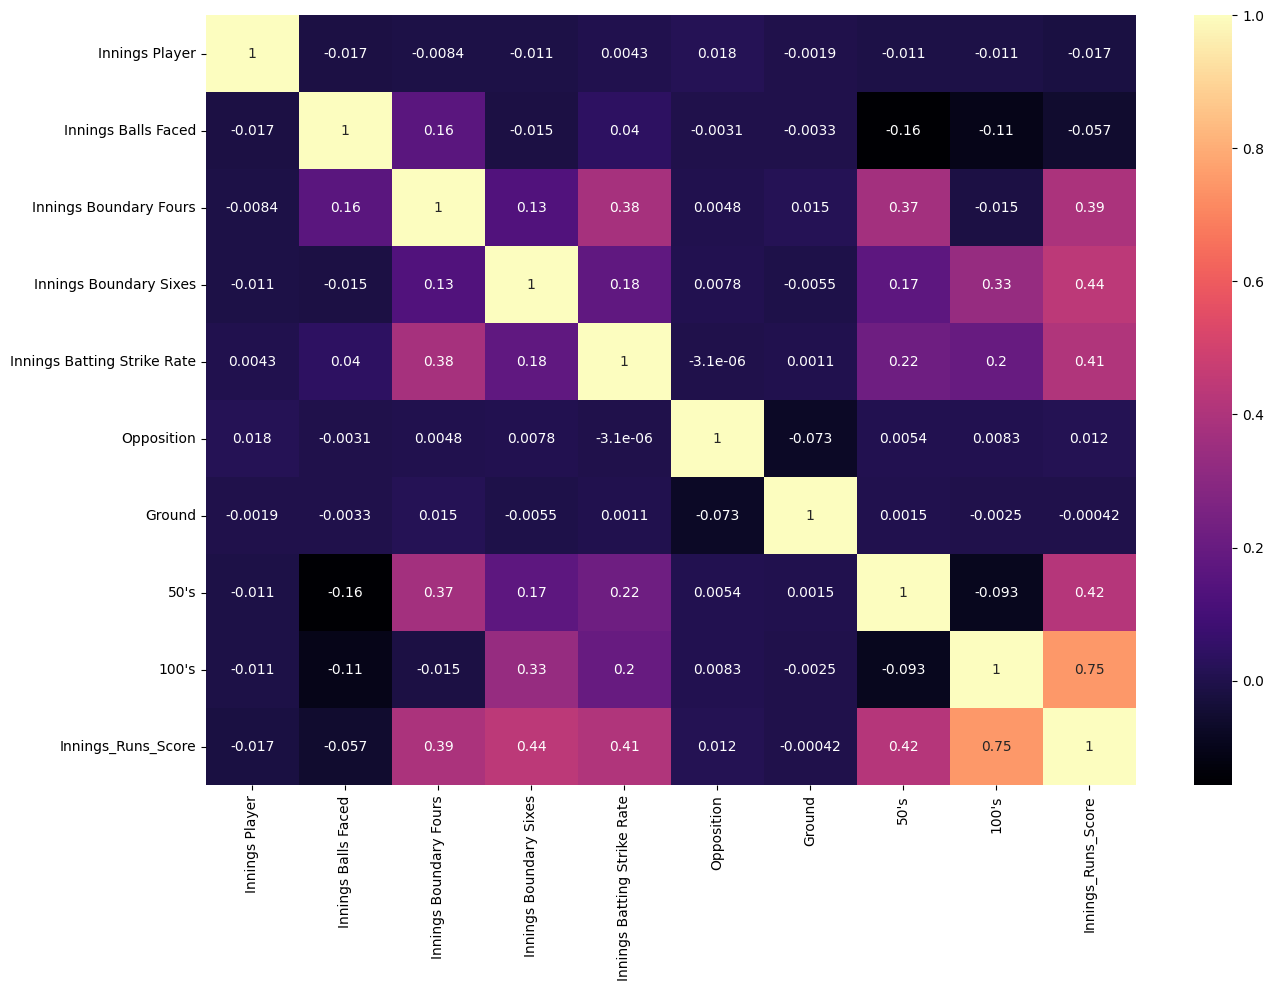

In [90]:
plt.rcParams['figure.figsize']=15,10
correlation=bat.corr()
sns.heatmap(correlation,cmap="magma",annot=True)
plt.show()

In [95]:
bat.head()

,Innings Player,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Opposition,Ground,50's,100's,Innings_Runs_Score
0,52,397,28,1,2585,5,6,0.0,1.0,294
1,52,392,11,1,2290,8,0,0.0,1.0,263
2,96,111,25,3,289,9,14,0.0,1.0,258
3,375,331,21,1,3174,8,56,0.0,1.0,254
4,52,334,21,1,2979,1,57,0.0,1.0,244


In [110]:
X= bat.drop(['Innings_Runs_Score'], axis=1)
y=bat['Innings_Runs_Score']


X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.33, random_state=42)

array([ 50,   0, 302, 119,  95,   8,   4, 101,  23,   1,   5,  77,  24,
        35,  26,  10,  22,  18,  88, 114,  11,  28,  61,  14,   3, 120,
         2,   9,  19,  17,  16,  46,  55,  21,  41,   6,  20,  12,  15,
        70,  79, 128, 117, 199,  39, 138,  30,  38,  62,  53,   7,  31,
        13, 164,  49,  34,  63,  60, 124,  44,  89,  36,  27,  99,  29,
       116,  90, 113,  48, 104,  42,  64,  67,  45, 187,  80,  97,  87,
        69,  43,  72,  32,  51, 144, 109, 203,  25,  81,  47,  52, 135,
        74, 118, 161,  82,  92,  84,  78,  86,  33, 185, 227, 108, 141,
       111, 127,  98,  54, 115, 139, 102, 176,  83, 179,  56,  91,  57,
       122, 200,  65, 151,  85, 129,  37, 253, 136, 126,  68, 137, 106,
        96, 204,  40, 121, 146,  71, 134,  93, 103,  59, 100,  58, 110,
        66,  73, 195,  76, 143, 107, 157, 329, 165,  94, 145,  75, 140,
       160, 275, 335, 131, 201, 213, 191, 156, 222, 166, 190, 132, 211,
       147, 194, 112, 278, 152, 218, 158, 149, 208, 260, 163, 14

In [113]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
model = Sequential()

model.add(Dense(43, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(22, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


In [115]:
es = EarlyStopping(monitor='val_loss', mode='min')
model.fit(x=X_train, y=y_train, epochs=400,
          validation_data=(X_test,y_test),
          callbacks=[es] )

Epoch 1/400
1952/1952 [==============================] - 6s 2ms/step - loss: 714.0066 - val_loss: 209.1931
Epoch 2/400
1952/1952 [==============================] - 5s 2ms/step - loss: 460.0547 - val_loss: 179.4906
Epoch 3/400
1952/1952 [==============================] - 6s 3ms/step - loss: 438.3619 - val_loss: 166.4782
Epoch 4/400
1952/1952 [==============================] - 5s 2ms/step - loss: 408.3310 - val_loss: 170.7640


<Axes: >

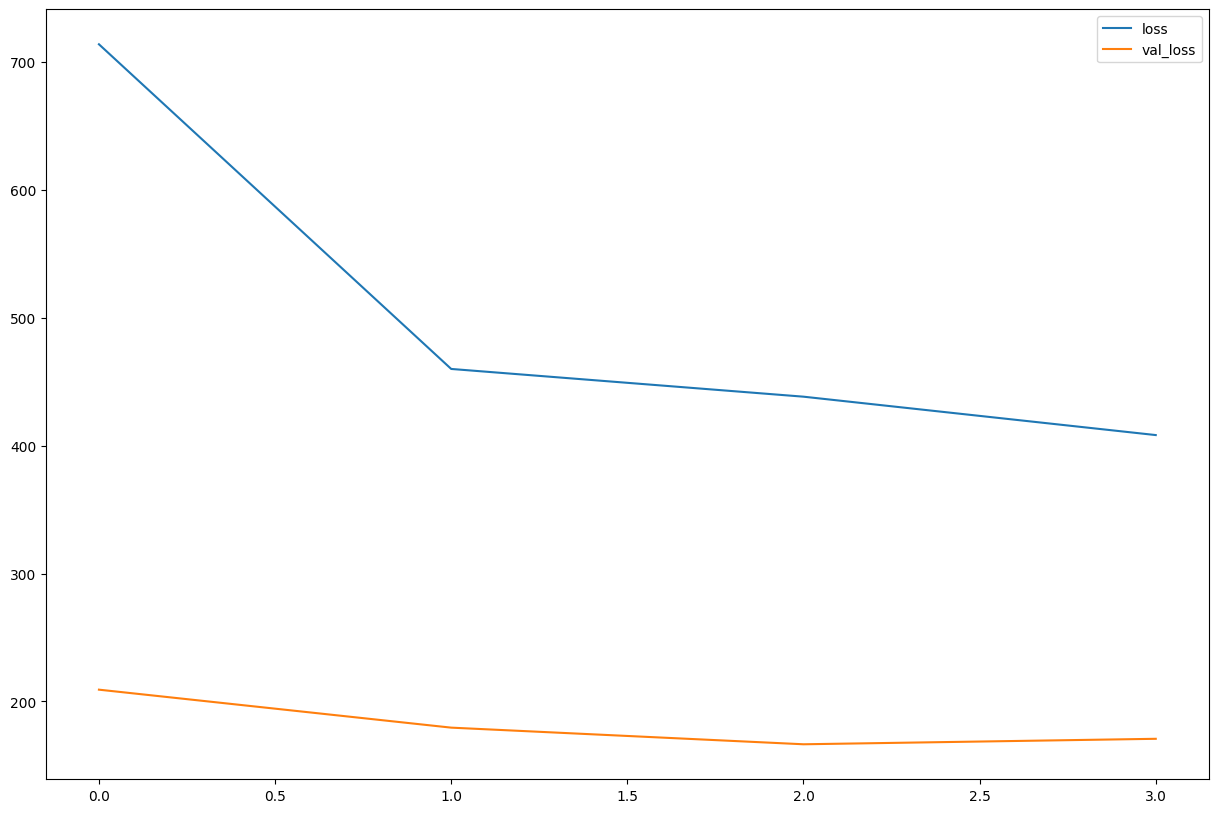

In [116]:

model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [129]:
predictions = model.predict(X_test)


962/962 [==============================] - 1s 1ms/step


In [131]:
output=pd.DataFrame(predictions,y_test)
output

,0
Innings_Runs_Score,
50,54.590881
0,5.290127
0,5.025712
302,145.657715
119,112.630730
...,...
27,23.835213
22,6.057292
10,5.461943
